In [1]:
from typing import List

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import summarize_features, print_df
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

import itertools


In [2]:
def load_cv_analytics_util_see_stats(filesuffix):
    cv_analytics_util = CvAnalyticsUtil.load_cv_analytics_utils(filesuffix)
    cv_analytics_util.get_cv_report();
    cv_analytics_util.display_graph()
    return cv_analytics_util

def plot_hist_side_by_side_for_class(df, label, xaxis, normalize = True, title=''):
    # Compute histogram
    plt.style.use('seaborn-deep')
    fig, ax = plt.subplots(1, 1, figsize=(20, 8))
    num_bins = 20
    positive_df = df[df[label] == 1]
    bin_edges = np.linspace(0, 1, num_bins + 1)
    hist_positive, bin_edges = np.histogram(positive_df[xaxis], bins=bin_edges)

    negative_df = df[df[label] == 0]
    hist_negative, bin_edges = np.histogram(negative_df[xaxis], bins=bin_edges)
    if normalize:
        hist_positive = hist_positive / sum(hist_positive)
        hist_negative = hist_negative / sum(hist_negative)
    ax.hist([bin_edges[:-1], bin_edges[:-1]], bin_edges, weights=[hist_positive, hist_negative], label=['positive', 'negative'])
    ax.legend(title=label)
    ax.set_ylabel('Class percentage')
    ax.set_xlabel(xaxis)
    plt.title(title)
    plt.show()

def get_dataset_with_predictions(cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years'):
    id_and_confidence = []
    for analytics_util in cv_analytics_util.analytics_utils:
        X_test = analytics_util.data_util.test_df
        X_test_mismatch = X_test.copy()
        y_pred, y_prob = analytics_util.get_predictions() 
        X_test_mismatch[f'{label}_pred'] = y_pred
        X_test_mismatch[f'{label}_prob'] = y_prob
        id_and_confidence.append(X_test_mismatch)
    full_dataset = pd.concat(id_and_confidence)
    return full_dataset



Cross-Validation measures:
+--------------------+----------+-------------+-----------+----------+
|                    |     mean |         std |       min |      max |
|--------------------+----------+-------------+-----------+----------|
| precision__class_0 | 0.999672 | 0.00017453  | 0.999376  | 1        |
| recall__class_0    | 0.996779 | 0.00104483  | 0.994471  | 0.997861 |
| f1-score__class_0  | 0.998223 | 0.000562362 | 0.997005  | 0.998839 |
| precision__class_1 | 0.126433 | 0.0560998   | 0.047619  | 0.228571 |
| recall__class_1    | 0.575    | 0.221153    | 0.222222  | 1        |
| f1-score__class_1  | 0.20617  | 0.0889157   | 0.0833333 | 0.372093 |
| accuracy           | 0.996455 | 0.00111982  | 0.99403   | 0.997682 |
| auc                | 0.942137 | 0.0484329   | 0.847961  | 0.999355 |
+--------------------+----------+-------------+-----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


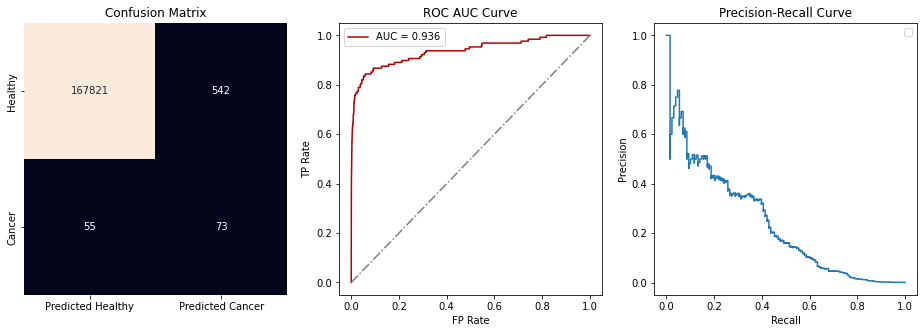

In [3]:
single_cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_single_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')

In [4]:
single_test_cols = single_cv_analytics_util.analytics_utils[0].data_util.test_df.columns.to_list()

In [5]:
len(single_test_cols)

156

In [6]:
id_col = 'index'
label = 'cancer_in_next_1_years'
id_and_confidence = []
for analytics_util in single_cv_analytics_util.analytics_utils:
    X_test = analytics_util.data_util.test_df[[id_col, 'plco_id', label]]
    X_test_mismatch = X_test.copy()
    y_pred, y_prob = analytics_util.get_predictions() 
    X_test_mismatch[f'{label}_pred'] = y_pred
    X_test_mismatch[f'{label}_prob'] = y_prob
    X_test_mismatch = X_test_mismatch[X_test_mismatch[label] != X_test_mismatch[f'{label}_pred']]
    X_test_mismatch = X_test_mismatch[X_test_mismatch[label] == 1]
    id_and_confidence.append(X_test_mismatch)
mid_conf_predictions = pd.concat(id_and_confidence)



Cross-Validation measures:
+--------------------+-----------+-------------+----------+----------+
|                    |      mean |         std |      min |      max |
|--------------------+-----------+-------------+----------+----------|
| precision__class_0 | 0.999538  | 0.000213696 | 0.999017 | 0.999823 |
| recall__class_0    | 0.996737  | 0.000937687 | 0.995118 | 0.998416 |
| f1-score__class_0  | 0.998135  | 0.000478139 | 0.997375 | 0.998983 |
| precision__class_1 | 0.0860821 | 0.0639138   | 0        | 0.25     |
| recall__class_1    | 0.379278  | 0.216944    | 0        | 0.777778 |
| f1-score__class_1  | 0.136798  | 0.0944087   | 0        | 0.378378 |
| accuracy           | 0.996279  | 0.000952593 | 0.994765 | 0.99797  |
| auc                | 0.819528  | 0.102631    | 0.670586 | 0.965602 |
+--------------------+-----------+-------------+----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


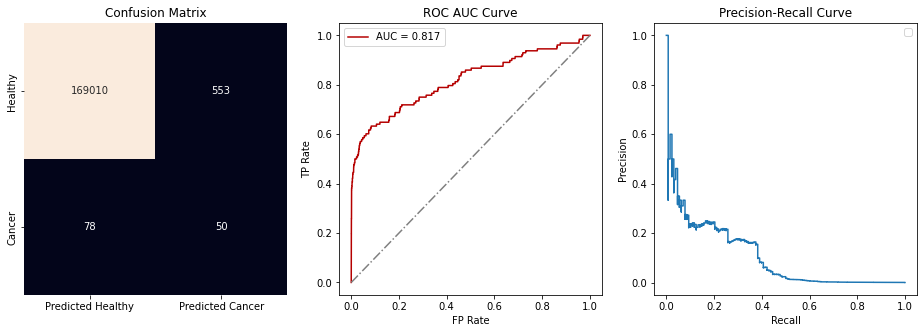

In [7]:
cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')

In [8]:
cv_analytics_util.store_cv_results()



Cross-Validation measures:
+--------------------+-----------+-------------+----------+----------+
|                    |      mean |         std |      min |      max |
|--------------------+-----------+-------------+----------+----------|
| precision__class_0 | 0.999538  | 0.000213696 | 0.999017 | 0.999823 |
| recall__class_0    | 0.996737  | 0.000937687 | 0.995118 | 0.998416 |
| f1-score__class_0  | 0.998135  | 0.000478139 | 0.997375 | 0.998983 |
| precision__class_1 | 0.0860821 | 0.0639138   | 0        | 0.25     |
| recall__class_1    | 0.379278  | 0.216944    | 0        | 0.777778 |
| f1-score__class_1  | 0.136798  | 0.0944087   | 0        | 0.378378 |
| accuracy           | 0.996279  | 0.000952593 | 0.994765 | 0.99797  |
| auc                | 0.819528  | 0.102631    | 0.670586 | 0.965602 |
+--------------------+-----------+-------------+----------+----------+




Cross-Validation measures:
+--------------------+------------+------------+------------+-----------+
|                    |       mean |        std |        min |       max |
|--------------------+------------+------------+------------+-----------|
| precision__class_0 | 0.999686   | 0.00019345 | 0.999231   | 0.999904  |
| recall__class_0    | 0.919911   | 0.00975177 | 0.901214   | 0.93476   |
| f1-score__class_0  | 0.958115   | 0.00526246 | 0.947952   | 0.966147  |
| precision__class_1 | 0.00581109 | 0.00249767 | 0.00110254 | 0.0104275 |
| recall__class_1    | 0.615588   | 0.200619   | 0.166667   | 0.888889  |
| f1-score__class_1  | 0.0115013  | 0.00492059 | 0.00219058 | 0.020555  |
| accuracy           | 0.919682   | 0.00967715 | 0.901107   | 0.934529  |
| auc                | 0.819528   | 0.102631   | 0.670586   | 0.965602  |
+--------------------+------------+------------+------------+-----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


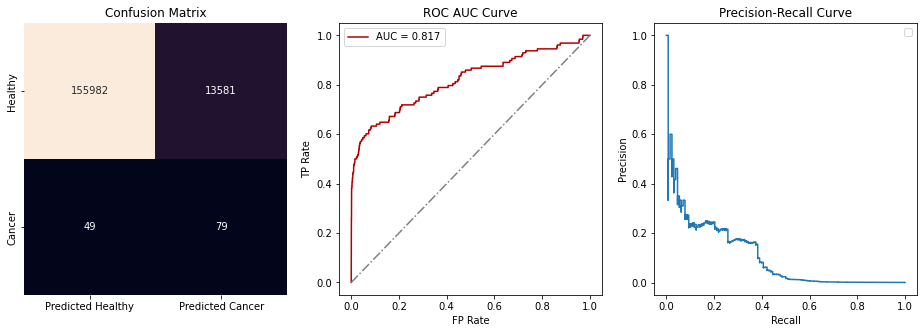

In [9]:
cv_analytics_util.update_thresholds(0.03)
cv_analytics_util.get_cv_report();
cv_analytics_util.display_graph()

In [10]:
test_cols = cv_analytics_util.analytics_utils[0].data_util.test_df.columns.to_list()

In [11]:
for col in test_cols:
    if col not in single_test_cols:
        print(col)

In [12]:
from oop_functions.util_functions import summarize_features, print_df, convert_numeric_to_float16

processed_data = pd.read_csv('./processed_dataset/recent_propagated_dataset.csv', index_col=0)
processed_data = convert_numeric_to_float16(processed_data)

In [13]:
processed_data[processed_data['ovar_cancer_years']  < processed_data['ovar_observe_year']][['ovar_cancer_years', 'study_yr', 'cancer_in_next_1_years', 'ovar_observe_year']]

,ovar_cancer_years,study_yr,cancer_in_next_1_years,ovar_observe_year


In [14]:

processed_data['ca125ii_level_binary'] = np.nan
processed_data.loc[processed_data['ca125ii_level'] < 35, 'ca125ii_level_binary'] = 1
processed_data.loc[processed_data['ca125ii_level'] >= 35 , 'ca125ii_level_binary'] = 2

In [15]:
# TODO: fix this one

In [16]:
cv_analytics_util.analytics_utils[0].data_util.imputer.impute_mean_cols == single_cv_analytics_util.analytics_utils[0].data_util.imputer.impute_mean_cols

True

In [17]:
full_dataset_single_original = get_dataset_with_predictions(single_cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')

In [18]:
# Create a copy of the whole dataset
label = 'cancer_in_next_1_years'
full_dataset = []
for analytics_util in cv_analytics_util.analytics_utils:
    X_test = analytics_util.data_util.test_df
    full_dataset.append(X_test.copy())
full_dataset = pd.concat(full_dataset)
processed_data = processed_data[full_dataset.columns]
full_dataset = processed_data[processed_data[id_col].isin(full_dataset[id_col])]


In [19]:
df_1 = single_cv_analytics_util.analytics_utils[0].data_util.test_df

In [36]:
df_1[df_1['cancer_in_next_1_years'] == 1][['index']]

,index
228,104.0
1412,116523.0
3046,1466.0
3188,191453.0
3777,79069.0
4414,117192.0
4752,154676.0
7808,79967.0
9633,155752.0


In [31]:
# single_cv_analytics_util.analytics_utils[0].data_util.test_df.columns == full_dataset.columns

In [32]:
single_cv_analytics_util.analytics_utils[0].data_util.imputer.imputer_mean.statistics_

array([1.02264751e-01, 1.42632120e-01, 1.79746233e-02, 3.46052268e+00,
       4.44726933e-01, 1.01685465e+00, 1.44322448e-01, 1.95592612e-01,
       3.18113984e-01, 2.10361481e-01, 1.53147567e-02, 8.09801092e-02,
       1.94674281e+00, 5.69871766e-02, 1.58375885e+02, 1.62210479e-02,
       3.97770524e-02, 1.20504051e+01, 1.26545915e+00, 1.53206821e+00,
       9.99258444e+01, 1.22281899e+01, 5.72804795e-02, 1.90794787e-05,
       8.80114971e-01, 4.03587329e-01, 1.83040787e+00, 1.11050834e+00,
       2.71893539e-01, 2.13911938e+00, 3.23334884e+00, 2.80827299e+00,
       2.86189565e+00, 2.69234233e+00, 4.62198484e-01, 6.27659838e+01,
       2.02458157e+00, 3.23185091e+00, 1.83644983e-02, 1.22101234e+01,
       1.54292497e+00, 1.96242526e+01, 1.55483138e+01, 7.56819324e-04,
       2.40436348e-01, 4.14954364e-01, 1.01197480e+00, 1.85992987e+00,
       9.28299419e-01, 9.35560182e-02, 1.71954839e-01, 2.50276933e+00,
       2.50752383e+01, 2.38447694e+00, 1.34135095e-01, 2.79140797e+00,
      

In [ ]:
# full_dataset = full_dataset_single_original

In [23]:
# Add those records to the test datasets of the single label dataset and test its validity
for analytics_util in single_cv_analytics_util.analytics_utils:
    # print(analytics_util.data_util.test_df.shape)
    idx = analytics_util.data_util.test_df['plco_id'].to_list()
    # print((full_dataset[full_dataset['plco_id'].isin(idx)].shape))
    analytics_util.data_util.test_df = full_dataset[full_dataset['plco_id'].isin(idx)]
    analytics_util.data_util.test_df = analytics_util.data_util.imputer.imputer_transform(analytics_util.data_util.test_df)


In [28]:
df_2 = single_cv_analytics_util.analytics_utils[0].data_util.test_df

In [26]:
df_1[df_1['index'] == 228522]

,plco_id,age,agelevel,arthrit_f,asp,asppd,bbd,bcontr_f,bcontra,bcontrt,...,uterine_fib,visboth,viseith,visl,visr,volum,was_screened,weight20_f,weight50_f,weight_f
3732,A-077228-7,70.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,5.0,...,1.0,0.0,0.0,0.0,0.0,10.0625,1.0,127.0,118.0,125.0


In [29]:
df_2[df_2['index'] == 228522]

,plco_id,age,agelevel,arthrit_f,asp,asppd,bbd,bcontr_f,bcontra,bcontrt,...,uterine_fib,visboth,viseith,visl,visr,volum,was_screened,weight20_f,weight50_f,weight_f
228522,A-077228-7,70.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,5.0,...,1.0,0,0,0,0,10.06438,1.0,127.0,118.0,125.0


In [ ]:
# Add those records to the test datasets of the single label dataset and test its validity
# for analytics_util in single_cv_analytics_util.analytics_utils:
#     idx = analytics_util.data_util.train_df['index'].to_list()
#     analytics_util.data_util.train_df = full_dataset[full_dataset['index'].isin(idx)]
#     analytics_util.data_util.train_df = analytics_util.data_util.imputer.imputer_transform(analytics_util.data_util.train_df)
#     analytics_util.fit()




Cross-Validation measures:
+--------------------+------------+-------------+-------------+------------+
|                    |       mean |         std |         min |        max |
|--------------------+------------+-------------+-------------+------------|
| precision__class_0 | 0.999606   | 0.000207996 | 0.999261    | 1          |
| recall__class_0    | 0.826221   | 0.0149979   | 0.805377    | 0.847867   |
| f1-score__class_0  | 0.904612   | 0.00899561  | 0.89211     | 0.917405   |
| precision__class_1 | 0.00250299 | 0.000965033 | 0.000967118 | 0.00430802 |
| recall__class_1    | 0.575      | 0.221153    | 0.222222    | 1          |
| f1-score__class_1  | 0.00498401 | 0.00192127  | 0.00192678  | 0.00857909 |
| accuracy           | 0.826027   | 0.0149783   | 0.805337    | 0.847453   |
| auc                | 0.766649   | 0.0839313   | 0.646126    | 0.936407   |
+--------------------+------------+-------------+-------------+------------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


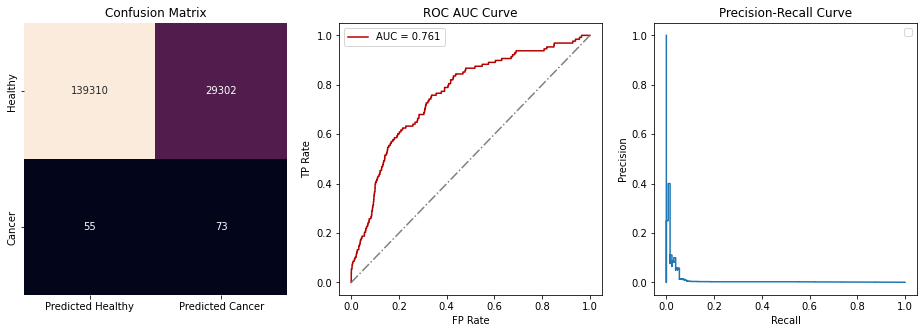

In [25]:
single_cv_analytics_util.update_thresholds(0.5)
single_cv_analytics_util.get_cv_report();
single_cv_analytics_util.display_graph()

In [ ]:
full_dataset_single_new = get_dataset_with_predictions(single_cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')

In [ ]:
plco_id = 228522

In [ ]:
full_dataset_single_new[full_dataset_single_new['cancer_in_next_1_years_prob'] > 0.9]['index']

26            26.0
29            29.0
45            45.0
104          104.0
232          232.0
            ...   
264670    264670.0
264676    264676.0
264683    264683.0
264684    264684.0
264700    264700.0
Name: index, Length: 18684, dtype: float64

In [ ]:
processed_data[processed_data['index'] == plco_id]

,plco_id,age,agelevel,arthrit_f,asp,asppd,bbd,bcontr_f,bcontra,bcontrt,...,uterine_fib,visboth,viseith,visl,visr,volum,was_screened,weight20_f,weight50_f,weight_f
228522,A-077228-7,70.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,5.0,...,1.0,0.0,0.0,0.0,0.0,NaN,1.0,127.0,118.0,125.0


In [ ]:
full_dataset_single_original[full_dataset_single_original['index'] == plco_id]

,plco_id,age,agelevel,arthrit_f,asp,asppd,bbd,bcontr_f,bcontra,bcontrt,...,viseith,visl,visr,volum,was_screened,weight20_f,weight50_f,weight_f,cancer_in_next_1_years_pred,cancer_in_next_1_years_prob
3732,A-077228-7,70.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,5.0,...,0.0,0.0,0.0,10.0625,1.0,127.0,118.0,125.0,1,0.552926


In [ ]:
full_dataset_single_new[full_dataset_single_new['index'] == plco_id]

,plco_id,age,agelevel,arthrit_f,asp,asppd,bbd,bcontr_f,bcontra,bcontrt,...,viseith,visl,visr,volum,was_screened,weight20_f,weight50_f,weight_f,cancer_in_next_1_years_pred,cancer_in_next_1_years_prob
228522,A-077228-7,70.0,2.0,0.0,1.0,1.0,0.0,1.0,2.0,5.0,...,0,0,0,10.06438,1.0,127.0,118.0,125.0,1,0.552926


In [ ]:
id_col = 'index'
label = 'cancer_in_next_1_years'
id_and_confidence = []
for analytics_util in cv_analytics_util.analytics_utils:
    X_test = analytics_util.data_util.test_df[[id_col, 'plco_id', label]]
    X_test_mismatch = X_test.copy()
    y_pred, y_prob = analytics_util.get_predictions() 
    X_test_mismatch[f'{label}_pred'] = y_pred
    X_test_mismatch[f'{label}_prob'] = y_prob
    X_test_mismatch = X_test_mismatch[X_test_mismatch[label] != X_test_mismatch[f'{label}_pred']]
    X_test_mismatch = X_test_mismatch[X_test_mismatch[label] == 1]
    id_and_confidence.append(X_test_mismatch)
mid_conf_predictions_2 = pd.concat(id_and_confidence)

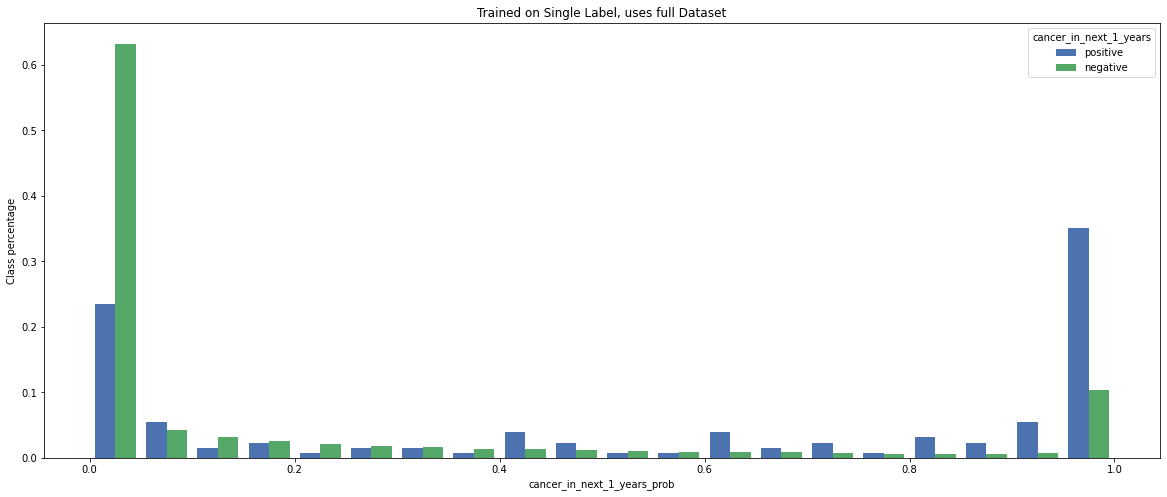

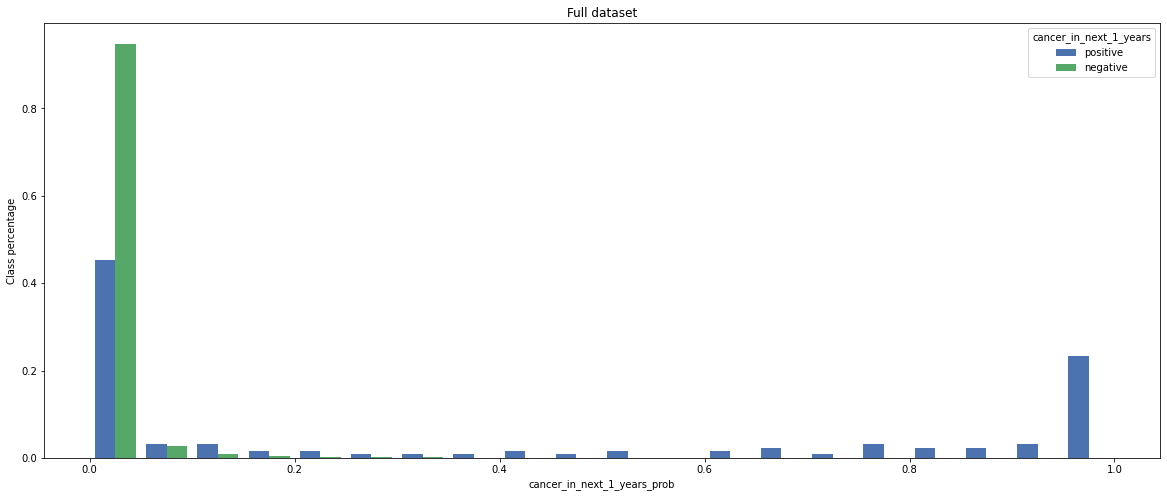

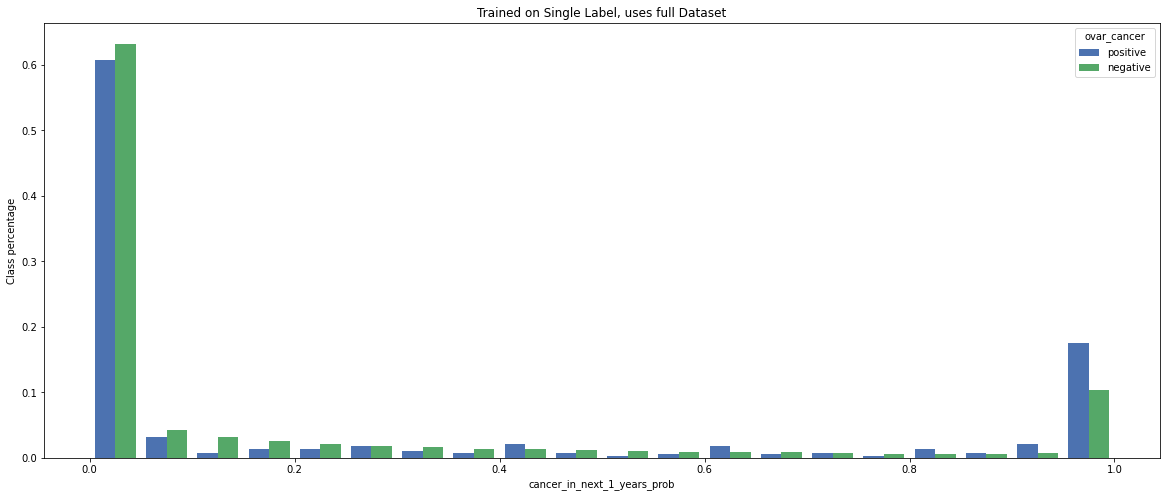

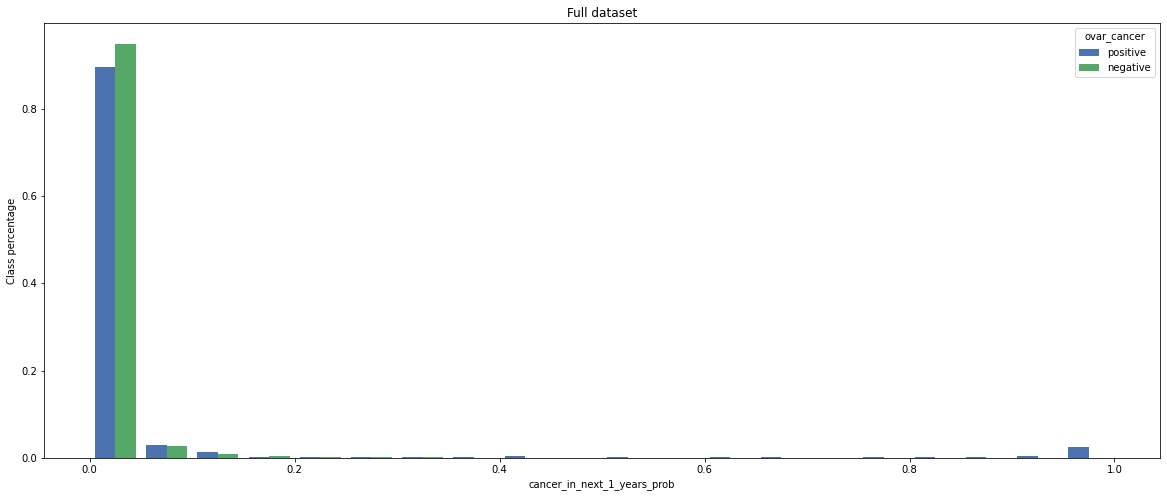

In [ ]:

full_dataset = get_dataset_with_predictions(single_cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')
plot_hist_side_by_side_for_class(full_dataset, 'cancer_in_next_1_years', 'cancer_in_next_1_years_prob', normalize = True, title='Trained on Single Label, uses full Dataset')
full_dataset = get_dataset_with_predictions(cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')
plot_hist_side_by_side_for_class(full_dataset, 'cancer_in_next_1_years', 'cancer_in_next_1_years_prob', normalize = True, title='Full dataset')

full_dataset = get_dataset_with_predictions(single_cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')
plot_hist_side_by_side_for_class(full_dataset, 'ovar_cancer', 'cancer_in_next_1_years_prob', normalize = True, title='Trained on Single Label, uses full Dataset')
full_dataset = get_dataset_with_predictions(cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')
plot_hist_side_by_side_for_class(full_dataset, 'ovar_cancer', 'cancer_in_next_1_years_prob', normalize = True, title='Full dataset')

In [ ]:
print([col for col in full_dataset.columns if 'year' in col])

['cancer_in_next_1_years', 'cig_years', 'ovar_cancer_years', 'ovar_observe_year', 'pack_years', 'cancer_in_next_1_years_pred', 'cancer_in_next_1_years_prob']




Cross-Validation measures:
+--------------------+-------------+-------------+----------+------------+
|                    |        mean |         std |      min |        max |
|--------------------+-------------+-------------+----------+------------|
| precision__class_0 | 0.999018    | 0.000206915 | 0.998636 | 0.999291   |
| recall__class_0    | 0.951551    | 0.00738089  | 0.939312 | 0.964915   |
| f1-score__class_0  | 0.974693    | 0.00384739  | 0.968312 | 0.981603   |
| precision__class_1 | 0.000536121 | 0.00104499  | 0        | 0.00339751 |
| recall__class_1    | 0.0290387   | 0.0543848   | 0        | 0.176471   |
| f1-score__class_1  | 0.00105241  | 0.00204987  | 0        | 0.00666667 |
| accuracy           | 0.950663    | 0.00731854  | 0.938571 | 0.963871   |
| auc                | 0.503692    | 0.0657869   | 0.381989 | 0.639815   |
+--------------------+-------------+-------------+----------+------------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


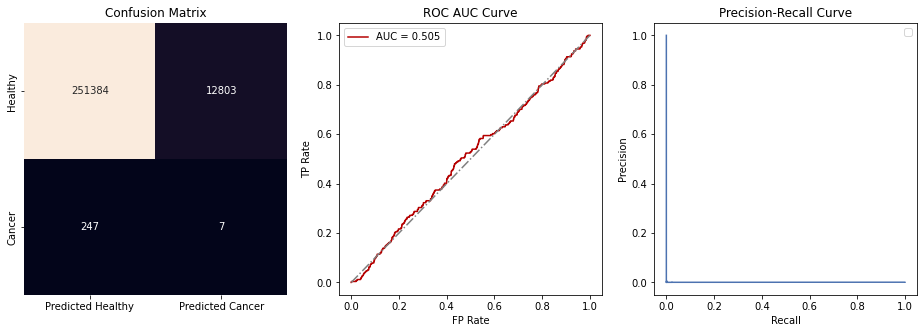

In [ ]:
cv_analytics_util_not_screened = load_cv_analytics_util_see_stats('experiment_not_screened_cols_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')

In [ ]:
def extract_full_dataset_filter_cancer(cv_analytics_util):
    full_dataset = get_dataset_with_predictions(cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')
    full_dataset = full_dataset[full_dataset['ovar_cancer'] == 1]
    full_dataset = full_dataset[full_dataset['ovar_cancer_years'] <= 5]
    return full_dataset

def plot_diff_in_confidence(full_dataset, title=''):
    
    grouped_df = full_dataset.groupby(['plco_id'])
    diff_df = []

    for key, item in grouped_df:
        diff = {}
        group = grouped_df.get_group(key)
        group = group.sort_values('study_yr').reset_index()
        diff['plco_id'] = group.loc[0, 'plco_id']
        years = group['study_yr'].unique()
        max_year = 6 - len(years)
        # max_year = 0
        for year in range(len(years) - 1):
            diff[f'cancer_in_next_1_years_{int(max_year + year+1)}-{int(max_year + year)}'] = group.loc[year+1, 'cancer_in_next_1_years_prob'] - group.loc[year, 'cancer_in_next_1_years_prob']
            # if len(years) == 5:
            #     print(diff)
        diff_df.append(diff)

    ordered_cols = []
    for i in range(5):
        ordered_cols.append(f'cancer_in_next_1_years_{i+1}-{i}')
        
    diff_df = pd.DataFrame(diff_df)

    diff_df = diff_df[['plco_id'] + ordered_cols]
    print_df(diff_df.describe().T)
    x = list(range(-1, -6, -1))
    stats = diff_df.describe()
    y = np.array(stats.loc['mean'].to_list())
    ci = np.array(stats.loc['std'].to_list())
    plt.plot(x, y)
    plt.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)
    plt.ylabel("Probability of getting cancer")
    plt.xlabel("Years before getting cancer")
    plt.ylim([0, 1])
    plt.title(title)

In [ ]:
def plot_change_in_confidence(full_dataset, title = ''):    
    grouped_df = full_dataset.groupby(['plco_id'])
    diff_df = []

    for key, item in grouped_df:
        diff = {}
        group = grouped_df.get_group(key)
        group = group.sort_values('study_yr').reset_index()
        diff['plco_id'] = group.loc[0, 'plco_id']
        years = group['study_yr'].unique()
        max_year = 6 - len(years)
        # max_year = 0
        for year in range(len(years)):
            diff[f'cancer_in_next_1_years_{int(max_year + year)}'] = group.loc[year, 'cancer_in_next_1_years_prob']
            # if len(years) == 5:
            #     print(diff)
        diff_df.append(diff)

    ordered_cols = []
    for i in range(6):
        ordered_cols.append(f'cancer_in_next_1_years_{i}')

    diff_df = pd.DataFrame(diff_df)

    diff_df = diff_df[['plco_id'] + ordered_cols]
    print_df(diff_df.describe().T)
    x = sorted(list(range(-1, -7, -1)))
    stats = diff_df.describe()
    y = np.array(stats.loc['mean'].to_list())
    ci = np.array(stats.loc['std'].to_list())
    plt.plot(x, y)
    plt.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)
    plt.ylabel("Probability of getting cancer")
    plt.xlabel("Years before getting cancer")
    plt.ylim([0, 1])
    plt.title(title)

In [ ]:
list(range(-1, -7, -1))

[-1, -2, -3, -4, -5, -6]

In [ ]:
# plot_diff_in_confidence(cv_analytics_util_not_screened, title='Year over year change in probability before getting cancer based on questionaire')

X-axis -1 means that somewhere withing the next year person gets cancer. -2 means somewhere between year -1 and 0 person gets cancer.

+--------------------------+---------+----------+----------+------------+-----------+----------+----------+----------+
|                          |   count |     mean |      std |        min |       25% |      50% |      75% |      max |
|--------------------------+---------+----------+----------+------------+-----------+----------+----------+----------|
| cancer_in_next_1_years_0 |       9 | 0.205629 | 0.123605 | 0.0228433  | 0.0936642 | 0.235332 | 0.313229 | 0.350099 |
| cancer_in_next_1_years_1 |      25 | 0.183414 | 0.126361 | 0.00753967 | 0.0803866 | 0.168209 | 0.266341 | 0.416783 |
| cancer_in_next_1_years_2 |      46 | 0.190244 | 0.136227 | 0.00468196 | 0.0691115 | 0.169603 | 0.272323 | 0.464448 |
| cancer_in_next_1_years_3 |      65 | 0.163666 | 0.12761  | 0.00468196 | 0.0487713 | 0.1535   | 0.260331 | 0.464448 |
| cancer_in_next_1_years_4 |      95 | 0.161879 | 0.129072 | 0.00468196 | 0.048815  | 0.137701 | 0.257809 | 0.528168 |
| cancer_in_next_1_years_5 |     254 | 0.171912 

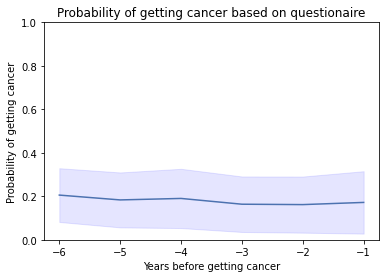

In [ ]:
full_dataset = extract_full_dataset_filter_cancer(cv_analytics_util_not_screened)
plot_change_in_confidence(full_dataset, title='Probability of getting cancer based on questionaire')

+--------------------------+---------+------------+------------+-------------+------------+------------+------------+------------+
|                          |   count |       mean |        std |         min |        25% |        50% |        75% |        max |
|--------------------------+---------+------------+------------+-------------+------------+------------+------------+------------|
| cancer_in_next_1_years_0 |       9 | 0.00409517 | 0.00294044 | 0.000602907 | 0.00150589 | 0.00402335 | 0.00671026 | 0.00852752 |
| cancer_in_next_1_years_1 |      25 | 0.00970133 | 0.015824   | 0.00057931  | 0.00150589 | 0.00237657 | 0.0103589  | 0.0639227  |
| cancer_in_next_1_years_2 |      46 | 0.0135557  | 0.0393781  | 0.000262159 | 0.00110413 | 0.00305837 | 0.00663093 | 0.254331   |
| cancer_in_next_1_years_3 |      65 | 0.0307687  | 0.127058   | 0.000336601 | 0.00150589 | 0.00445091 | 0.0111553  | 0.98594    |
| cancer_in_next_1_years_4 |      95 | 0.0588727  | 0.172759   | 0.00022433  | 0.00

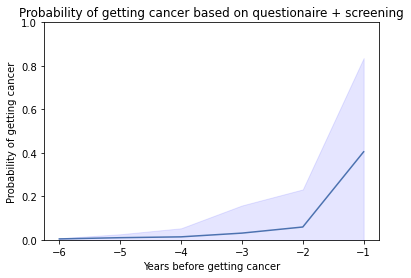

In [ ]:
full_dataset = extract_full_dataset_filter_cancer(cv_analytics_util)
plot_change_in_confidence(full_dataset, title='Probability of getting cancer based on questionaire + screening')

+--------------------------+---------+-----------+-----------+-------------+------------+------------+------------+----------+
|                          |   count |      mean |       std |         min |        25% |        50% |        75% |      max |
|--------------------------+---------+-----------+-----------+-------------+------------+------------+------------+----------|
| cancer_in_next_1_years_0 |   21891 | 0.0119889 | 0.0435118 | 7.62146e-05 | 0.00133387 | 0.0031314  | 0.00821532 | 0.994541 |
| cancer_in_next_1_years_1 |   25366 | 0.0133796 | 0.046329  | 4.122e-05   | 0.00129392 | 0.00313367 | 0.00871808 | 0.986782 |
| cancer_in_next_1_years_2 |   27192 | 0.0131742 | 0.0465278 | 4.76322e-05 | 0.00132798 | 0.00318041 | 0.00870222 | 0.996437 |
| cancer_in_next_1_years_3 |   28787 | 0.0142536 | 0.0541463 | 5.97713e-05 | 0.00133433 | 0.00319472 | 0.00865509 | 0.996019 |
| cancer_in_next_1_years_4 |   30816 | 0.0152046 | 0.0547775 | 5.44262e-05 | 0.00142117 | 0.00347886 | 0.009631

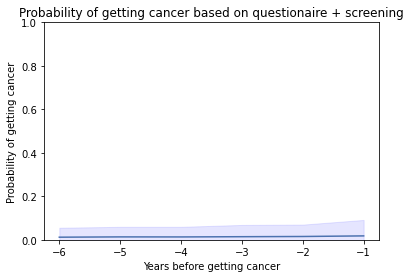

In [ ]:
full_dataset = get_dataset_with_predictions(cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')
plot_change_in_confidence(full_dataset, title='Probability of getting cancer based on questionaire + screening')

In [ ]:
full_dataset = get_dataset_with_predictions(cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')

threshold = 0.2
idx = full_dataset[(full_dataset['cancer_in_next_1_years_prob'] >= threshold) & (full_dataset['ovar_cancer'] == 0)]['plco_id'].unique()
full_dataset = full_dataset[full_dataset['plco_id'].isin(idx)]
full_dataset = full_dataset[full_dataset['study_yr'] >= 0]
full_dataset = full_dataset[full_dataset['ovar_observe_year'] <= 5]
dict_years_pred = {}
 
for plco_id in full_dataset['plco_id'].unique():
    # TODO: i can change min and max
    dict_years_pred[plco_id] = full_dataset[(full_dataset['plco_id'] == plco_id) & (full_dataset['cancer_in_next_1_years_prob'] >= threshold)]['ovar_observe_year'].min()
    full_dataset = full_dataset[((full_dataset['plco_id'] == plco_id) & (full_dataset['ovar_observe_year'] <= dict_years_pred[plco_id])) | (full_dataset['plco_id'] != plco_id)]

+--------------------------+---------+-----------+-----------+-------------+------------+------------+-----------+----------+
|                          |   count |      mean |       std |         min |        25% |        50% |       75% |      max |
|--------------------------+---------+-----------+-----------+-------------+------------+------------+-----------+----------|
| cancer_in_next_1_years_0 |      42 | 0.022902  | 0.0416612 | 0.000685575 | 0.00290837 | 0.00593714 | 0.0181068 | 0.181252 |
| cancer_in_next_1_years_1 |     116 | 0.0322265 | 0.0448958 | 0.000180863 | 0.00323946 | 0.0120135  | 0.0420646 | 0.195259 |
| cancer_in_next_1_years_2 |     235 | 0.0395342 | 0.0503198 | 0.00039002  | 0.00465872 | 0.0183188  | 0.0523261 | 0.193886 |
| cancer_in_next_1_years_3 |     389 | 0.0418522 | 0.0491788 | 0.00020195  | 0.0065349  | 0.020088   | 0.0574548 | 0.198686 |
| cancer_in_next_1_years_4 |     580 | 0.0513528 | 0.0542121 | 0.000291672 | 0.00867839 | 0.0285976  | 0.0813323 | 0.1

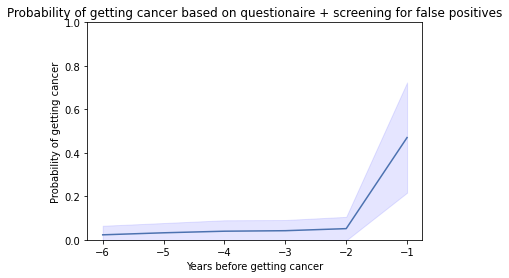

In [ ]:
# full_dataset = full_dataset[full_dataset['cancer_in_next_1_years_prob'] >= threshold]
plot_change_in_confidence(full_dataset, title='Probability of getting cancer based on questionaire + screening for false positives')